In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("cleansed.csv",index_col=0, keep_default_na=False,parse_dates=["date_added"])

df1 = df.copy()
df1


,resource_type,indicator,owner_name,rating,confidence,threat_assess_confidence,threat_assess_rating,date_added,Country,Architecture,Target,Tags
0,ADDRESSES,122.177.174.216,Blocklist.de SSH IPs,4.0,4,4.0,4.0,2021-03-30 09:15:03,,,,
1,HOSTS,scurityidlockinfowellsfargo.com,CAL Finance-themed NRDs,3.0,61,62.0,3.0,2022-05-11 00:00:00,,,,Host.RecentlyRegistered.7D;
2,HOSTS,down.flash-plays.com,Firebog Prigent Malware Domains,3.0,75,75.0,3.0,2021-06-03 02:29:12,,,,
3,FILES,"{'md5': '222BFA268954D953348A11FAEC0E011F', 's...",MalShare Daily Malware List,3.0,69,69.0,3.0,2021-06-23 15:15:04,,,,
4,FILES,"{'md5': 'BE75224E48976EB4BA3FAEB9D0D14A5F', 's...",MalShare Daily Malware List,3.0,69,69.0,3.0,2021-11-19 05:00:00,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
4249748,URLS,http://178.175.117.56:53099/Mozi.a,abuse.ch URLHaus,3.0,65,65.0,3.0,2021-04-29 12:05:20,,,,elf;malware_download;Mozi;
4249749,URLS,http://182.59.42.217:40443/Mozi.m,abuse.ch URLHaus,3.0,65,65.0,3.0,2020-11-10 11:56:02,,,,elf;malware_download;Mozi;
4249750,URLS,http://sanavitawellnesscoaching.com/b/auth/log...,OpenPhish,3.0,0,0.0,3.0,2019-11-19 14:51:38,,,,
4249751,URLS,http://182.121.147.99:51686/Mozi.m,abuse.ch URLHaus,3.0,65,65.0,3.0,2021-05-07 01:05:09,,,,elf;malware_download;Mozi;


In [2]:
df1 = df1[["resource_type","indicator","owner_name","rating","confidence","date_added","Tags"]]

df1 = df1.join(pd.get_dummies(df1.resource_type, prefix='type'))
df1


,resource_type,indicator,owner_name,rating,confidence,date_added,Tags,type_ADDRESSES,type_CUSTOM INDICATORS,type_EMAIL ADDRESSES,type_FILES,type_HOSTS,type_URLS
0,ADDRESSES,122.177.174.216,Blocklist.de SSH IPs,4.0,4,2021-03-30 09:15:03,,1,0,0,0,0,0
1,HOSTS,scurityidlockinfowellsfargo.com,CAL Finance-themed NRDs,3.0,61,2022-05-11 00:00:00,Host.RecentlyRegistered.7D;,0,0,0,0,1,0
2,HOSTS,down.flash-plays.com,Firebog Prigent Malware Domains,3.0,75,2021-06-03 02:29:12,,0,0,0,0,1,0
3,FILES,"{'md5': '222BFA268954D953348A11FAEC0E011F', 's...",MalShare Daily Malware List,3.0,69,2021-06-23 15:15:04,,0,0,0,1,0,0
4,FILES,"{'md5': 'BE75224E48976EB4BA3FAEB9D0D14A5F', 's...",MalShare Daily Malware List,3.0,69,2021-11-19 05:00:00,,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249748,URLS,http://178.175.117.56:53099/Mozi.a,abuse.ch URLHaus,3.0,65,2021-04-29 12:05:20,elf;malware_download;Mozi;,0,0,0,0,0,1
4249749,URLS,http://182.59.42.217:40443/Mozi.m,abuse.ch URLHaus,3.0,65,2020-11-10 11:56:02,elf;malware_download;Mozi;,0,0,0,0,0,1
4249750,URLS,http://sanavitawellnesscoaching.com/b/auth/log...,OpenPhish,3.0,0,2019-11-19 14:51:38,,0,0,0,0,0,1
4249751,URLS,http://182.121.147.99:51686/Mozi.m,abuse.ch URLHaus,3.0,65,2021-05-07 01:05:09,elf;malware_download;Mozi;,0,0,0,0,0,1


In [75]:
# Convert to datetime
df2 = df1.copy()
df2['count'] = ' '

# I think this should NOT be mean but another aggregate function... maybe variance? No... max?

df3 = df2.groupby(pd.Grouper(key='date_added', freq='1D'))["rating"].mean().reset_index()
df4 = df2.groupby(pd.Grouper(key='date_added', freq='1D'))["confidence"].mean().reset_index()
df5 = df2.groupby(pd.Grouper(key='date_added', freq='1D'))[['type_ADDRESSES','type_CUSTOM INDICATORS','type_EMAIL ADDRESSES','type_FILES','type_HOSTS','type_URLS']].sum().reset_index()
df2 = df2.groupby(pd.Grouper(key='date_added', freq='1D'))["count"].count().reset_index()

df2['avg_rating'] = df3['rating']
df2['avg_confidence'] = df4['confidence']
df2[['type_ADDRESSES','type_CUSTOM INDICATORS','type_EMAIL ADDRESSES','type_FILES','type_HOSTS','type_URLS']] = df5[['type_ADDRESSES','type_CUSTOM INDICATORS','type_EMAIL ADDRESSES','type_FILES','type_HOSTS','type_URLS']]
mean = df2["count"].mean()
# df2.drop(df2[df2['count']==0].index, inplace=True)
df2.fillna(0, inplace=True)

In [76]:
import numpy as np

# data = pd.DataFrame(df2['count'])
data = df2[['count','avg_rating','avg_confidence','type_ADDRESSES','type_CUSTOM INDICATORS','type_EMAIL ADDRESSES','type_FILES','type_HOSTS','type_URLS']]
# data = df2[['count','avg_rating','avg_confidence']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

print(data.isnull().sum().sum())

model =  IsolationForest(contamination=0.017)
model.fit(data) 
df2['anomaly'] = pd.Series(model.predict(data))
df2

0


,date_added,count,avg_rating,avg_confidence,type_ADDRESSES,type_CUSTOM INDICATORS,type_EMAIL ADDRESSES,type_FILES,type_HOSTS,type_URLS,anomaly
0,2017-09-08,25533,3.633964,55.073904,16219.0,0.0,0.0,0.0,9314.0,0.0,-1
1,2017-09-09,24,2.958333,31.125000,2.0,0.0,0.0,0.0,22.0,0.0,1
2,2017-09-10,11,3.545455,29.545455,10.0,0.0,1.0,0.0,0.0,0.0,1
3,2017-09-11,9,3.333333,41.000000,9.0,0.0,0.0,0.0,0.0,0.0,1
4,2017-09-12,20,3.100000,50.600000,16.0,0.0,0.0,0.0,4.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1712,2022-05-17,12131,2.934960,60.270134,6125.0,27.0,76.0,2220.0,2656.0,1027.0,-1
1713,2022-05-18,7400,3.226351,73.098919,4686.0,18.0,67.0,37.0,2192.0,400.0,1
1714,2022-05-19,10883,2.919691,59.637140,6236.0,29.0,68.0,2227.0,1233.0,1090.0,1
1715,2022-05-20,6678,3.028601,50.149596,4029.0,6.0,0.0,2200.0,0.0,443.0,1


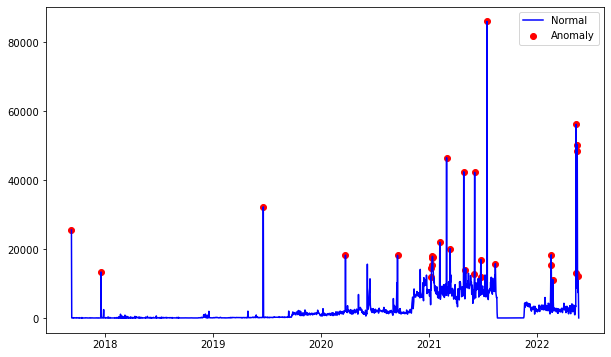

Number of anomaly samples:  30


In [77]:
fig, ax = plt.subplots(figsize=(10,6))

a = df2.loc[df2['anomaly'] == -1] #anomaly
di = {1: "Normal", -1: "Anomaly"}
df2 = df2.replace({"anomaly": di})
ax.plot(df2['date_added'], df2['count'], color='blue', label = 'Normal')
ax.scatter(a['date_added'],a['count'], color='red', label = 'Anomaly')
# plt.axhline(y=mean, color='r', linestyle='-')
plt.legend()
plt.show();
print("Number of anomaly samples: ", df2.anomaly.loc[df2['anomaly'] == 'Anomaly'].count())

In [78]:
df2.to_csv('MultivariateIsolationForestAnomaly.csv')
df2

,date_added,count,avg_rating,avg_confidence,type_ADDRESSES,type_CUSTOM INDICATORS,type_EMAIL ADDRESSES,type_FILES,type_HOSTS,type_URLS,anomaly
0,2017-09-08,25533,3.633964,55.073904,16219.0,0.0,0.0,0.0,9314.0,0.0,Anomaly
1,2017-09-09,24,2.958333,31.125000,2.0,0.0,0.0,0.0,22.0,0.0,Normal
2,2017-09-10,11,3.545455,29.545455,10.0,0.0,1.0,0.0,0.0,0.0,Normal
3,2017-09-11,9,3.333333,41.000000,9.0,0.0,0.0,0.0,0.0,0.0,Normal
4,2017-09-12,20,3.100000,50.600000,16.0,0.0,0.0,0.0,4.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...
1712,2022-05-17,12131,2.934960,60.270134,6125.0,27.0,76.0,2220.0,2656.0,1027.0,Anomaly
1713,2022-05-18,7400,3.226351,73.098919,4686.0,18.0,67.0,37.0,2192.0,400.0,Normal
1714,2022-05-19,10883,2.919691,59.637140,6236.0,29.0,68.0,2227.0,1233.0,1090.0,Normal
1715,2022-05-20,6678,3.028601,50.149596,4029.0,6.0,0.0,2200.0,0.0,443.0,Normal
